# Credit Card Fraud Detection:

### 1. Data Preprocessing:

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Import the dataset
dataset = pd.read_csv("creditcard.csv")

In [3]:
#Display first 5 columns of dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We cannot observe all the columns of the dataset. Thus I am checking the columns of the dataset to see how it looks.

In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#Checking the datatypes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Also checking the size of the dataset
dataset.shape

(284807, 31)

The dataset has over more than 200,000 samples with 31 columns.

In [7]:
#Checking if the dataset contains any null values
dataset.isnull().values.any()

False

Okay, so it has no null values! Great. Now let us check the distributions of the dataset

In [8]:
#Determining the statistical properties of the dataset
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Notice the mean of Class. It is 0.001727. Why is that? Does this mean that we have a dataset of less frauds and more of normal transactions? We need to check this out further by plotting histograms 

### 2. Exploratory Data Analysis (EDA):

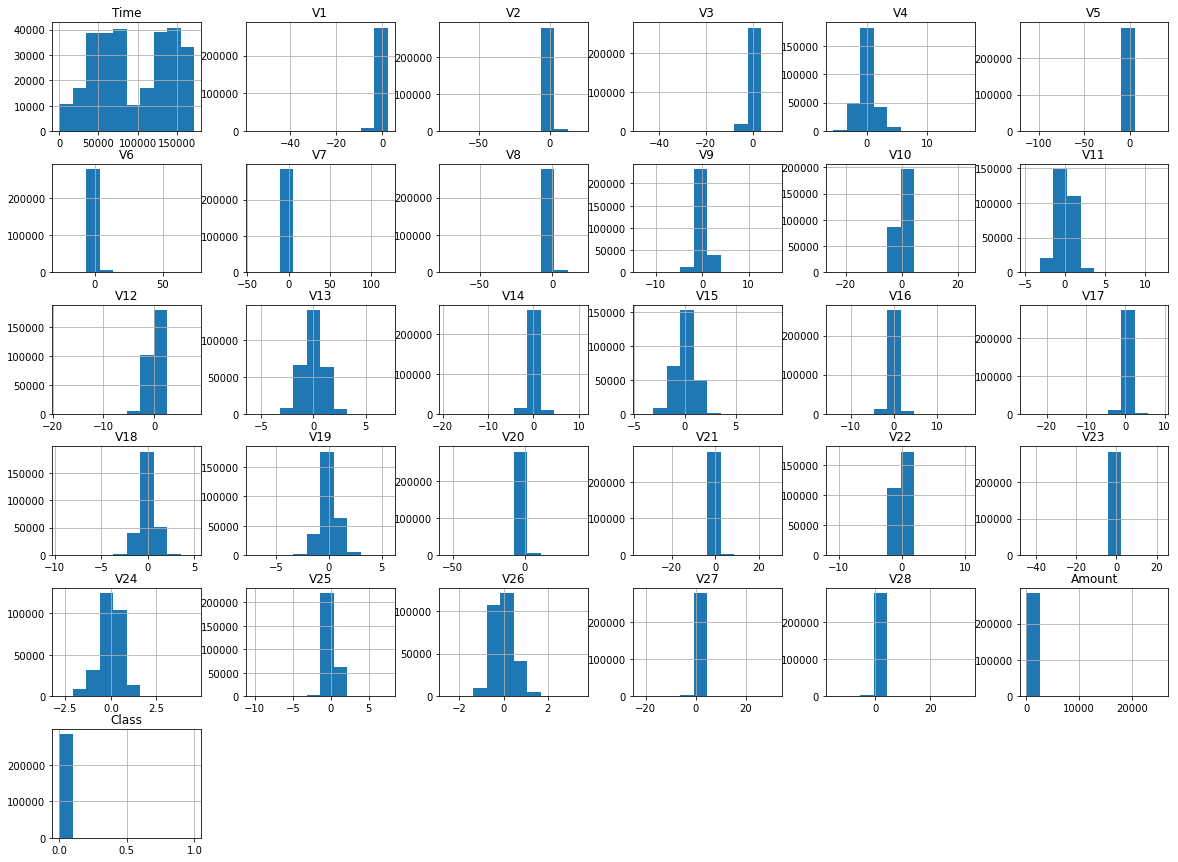

In [9]:
#Determine the histogram of the entire dataset
dataset.hist(figsize = (20, 15))
plt.show()

We can observe how the distribution of the columns is close to 0 and there are barely any cases close to 1. This shows that the data by itself is very unbalanced. Let us check the number of fraud cases, valid cases and the outlier fraction.

In [10]:
#Determine the number of fraud cases in the dataset
fraud = dataset[dataset['Class'] == 1]

#Determine the number of real cases in the dataset
valid = dataset[dataset['Class'] == 0]

#Determine the outlier fraction from the total dataset
outlier_fraction = float(len(fraud))/float(len(valid))

#Print the outputs
print('The outlier fraction of the dataset is {}'.format(outlier_fraction))
print('The number of fraud cases are {}'.format(len(fraud)))
print('The number of valid cases are {}'.format(len(valid)))

The outlier fraction of the dataset is 0.0017304750013189597
The number of fraud cases are 492
The number of valid cases are 284315


The outlier fraction is close to 0. This shows the lack of the number of fraud cases against the valid ones. Let us check the transactions performed depending on the amount, but categorically.

In [28]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The mean is slightly on the higher side, obviously because of lower inputs. Also notice that the maximum amount of fraud transaction is only $2125 dollars. Let us also check the one of valid transactions:

In [30]:
valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

The mean is very low, due to higher inputs. Notice that the maximum transaction here is $25691. We need to plot these graphs and check the distributions across amount and number of transactions

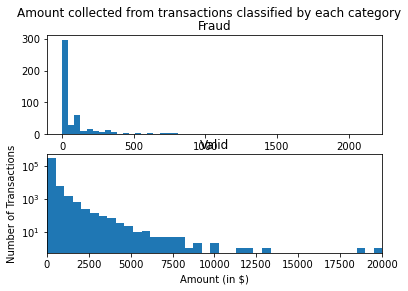

In [22]:
from matplotlib.pyplot import figure
f, (a,b) = plt.subplots(2, 1)
f.suptitle("Amount collected from transactions classified by each category")
a.set_title('Fraud')
a.hist(x=fraud['Amount'], bins = 50)
plt.xlabel('Amount (in $)')
plt.ylabel('Number of Transactions')
b.set_title('Valid')
b.hist(x=valid['Amount'], bins = 50)
plt.xlabel('Amount (in $)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

The number of fraud transactions are much lesser than the valid transactions.
Now let us check the association of each of the samples using a heatmap.

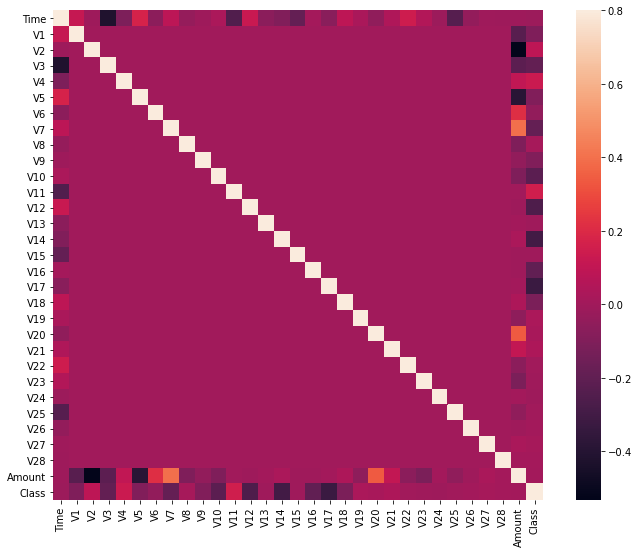

In [23]:
#Build correlation matrix
cor = dataset.corr()
figure = plt.figure(figsize=(12,9))
sns.heatmap(cor, vmax= 0.8, square= True)
plt.show()

In the heat map, we can clearly see that most of the features are not correlated with other features, but there are some features that are positively or negatively correlated with each other. For example, V2 and V5 are strongly negatively correlated with the Amount function. We also see some correlation with the V20 and Amount. This gives us a deeper understanding of the data available to us.

### 3. Model Prediction:

Unlike classification models, that are believed to only be incorporated across datasets with even distribution of classes, we employ a different approach given to be known as an Anomaly detection models. They are two such types of classifiers in this model, given as follows:
#### 1. Local Outlier Factor (LOF):
The Local Outlier Factor (LOF) algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general. I used 40 for my dataset due to 200,000 samples.

#### 2. Isolation Tree Classifier:
It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

I also tried using SVM, but owing to a humongous size and after multiple failed attempts, I refused to perform any more operation on it.

#### Using Local Outlier Factor (LOF):

In [24]:
from sklearn.model_selection import train_test_split
#Dividing the dataset into X and y factor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
#Creating an instance c1 for LOF
c1 = LocalOutlierFactor(n_neighbors = 40, contamination = outlier_fraction)
#Performing fit_predict for all the values of X
y_pred = c1.fit_predict(X)

#Changing the output of y_pred as the fit_predict function performs feature scaling to the outputs over the scale of -1 to +1
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

#Creating an error variable that aggregates the miscalculated 
error = (y != y_pred).sum()
print("Local Outlier Factor classifier observes {}/{} errors (outliers)".format(error, len(y)))

Local Outlier Factor classifier observes 972/284807 errors (outliers)


In [27]:
print("Classification Report:")
print(classification_report(y, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y, y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.01      0.01      0.01       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807

Accuracy Score: 0.9965871625346288


#### Using Isolation Tree Classifier:

In [31]:
from sklearn.ensemble import IsolationForest
c2 = IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = 1)
c2.fit(X)

IsolationForest(contamination=0.0017304750013189597, max_samples=284807,
                random_state=1)

In [32]:
y_pred = c2.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
error = (y != y_pred).sum()
print("Isolation Forest classifier observes {}/{} number of errors".format(error, len(y)))

Isolation Forest classifier observes 647/284807 number of errors in the y_test sample


In [33]:
print("Classification Report:")
print(classification_report(y, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y, y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Accuracy Score: 0.9977282861727416


The accuracy score is much better than LOF. Let's check the confusion matrix as well.

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[283991    324]
 [   323    169]]


#### Observations:
1. The accuracy is extremely high only because of the bias of the dataset observed. While that is a good sign of the bank company, it does not achieve in efficient distribution of the classes as valid and fradulent transactions.
2. With LOF, the precision and the recall of the fradulent transactions are very low. This mean that, we have only 1% of the fradulent transactions that were actually fradulent and were predicted correctly. However, with Isolation Tree, precision soars upto 34% which is a lot better than the former, but its percent value is still low, which is unavoidable because of a bias in the dataset.
3. The accuracy score of Isolation Tree Classifier leads LOF, because, LOF identified 972 errors whereas Isolation Forest identified 647 errors out of 284807 samples.
4. Overall, we can conclude that Isolation Forest Method performed much better in determining fraud transactions which is around 34%
5. We can improve the accuracy of the output by performing hyperparameter tuning, or using Deep Learning (CNN). We can also use complex anomaly detection models to achieve better accuracy so as to determine more fraudulent cases.